In [85]:
#data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('mnist_train.csv')
df.shape
print(df.columns)
#we are creating one numpy array from panda dataframe
data_value = df.values
print(data_value.shape)
print(type(data_value))

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
(60000, 785)
<class 'numpy.ndarray'>


In [87]:
# taking only 0 and 1 from the data_value

data_point = []
for i in range(data_value.shape[0]):
  if data_value[i][0] == 1 or data_value[i][0] == 0:
    data_point.append(data_value[i])

data_point = np.array(data_point)
print(data_point)
print(data_point.shape)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(12665, 785)


In [109]:
#we are going to divide X into training data and testing data

split = int(0.8*data_point.shape[0])
print(split)

np.random.shuffle(data_point)

X_train = data_point[:split,1:]
X_test = data_point[split:,1:]

Y_train = data_point[:split,0]
Y_test = data_point[split:,0]

print(X_train.shape, Y_train.shape)
print(X_train)
#print(type(Y_test))
#print(X_train.mean(axis=0))
print(X_test.shape, Y_test.shape)

10132
(10132, 784) (10132,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2533, 784) (2533,)


In [110]:

#data normalisation means means we want zero mean and unit standard deviation along each axis
x_mean = X_train.mean(axis = 0) 
#print(X_train)
print(x_mean.shape)
#print(x_mean)
x_std = X_train.std(axis=0)
x_std[x_std == 0] = 0.00000001
print(x_std.shape)
#print(x_std)

# Apply the transformation (value - mean)/std.dev which is also a z-score normalisation
X_train = (X_train - x_mean) / x_std
print(X_train)
# we should do normalisation of testing as well as training data too.
x_std = X_test.std(axis=0)
x_std[x_std == 0] = 0.00000001
X_test = (X_test - x_mean)/x_std  
#print(X_test.shape)


(784,)
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
   # Prediction and Accuracy of Logistic regression model
   
   #we have to add dumy row of 1 in test data as well because we have added that colm in train data
   X_new_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
   print(X_new_test.shape)
   print(X_new_test[:3,:])
   

(2533, 785)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [112]:
def predict(X,theta):
  #theta is model parameter
  # first of all calculate hypothesis by calling hypothesis fn
  h = hypothesis(X, theta)
  # if score is greter than or equal to 0.5 we will make that label 1 and if it is less tha .5 then we will make the label 0
  # label will be of type 1 or 0
  output = np.zeros(h.shape) # output is of shape h
  output[h >= 0.5] = 1  #make value in output 1 at those locations where value of h is greater than 0.5
  output = output.astype('int') #we are changing type of output as int because it may be possible that our output values are in type float
  return output

# X_train_pred = predict(X_new_train,theta)
# X_test_pred = predict(X_new_test, theta)

#print(X_test_pred.shape)

In [113]:
# Accuracy - for it we need to know the actucal values and we need to know the prediction values
def accuracy(actual, preds):
  #actual means y_train
  
  actual = actual.astype('int')
  
  actual = actual.reshape((-1,1)) # we should check both the arrays of same shape. for that reshape both of them into the colm vector only
  #print(np.sum(actual == preds))
  acc = np.sum(actual == preds)/actual.shape[0] 
  return acc*100


In [114]:
  def sigmoid(x):
    # given any real number x we need to convert it into the range 0 to 1
    return 1.0/(1.0 + np.exp(-x))
  
  def hypothesis(X, theta):
    # this function is going to return hypothesis vector
    return sigmoid(np.dot(X, theta))
  

  def error(X, y, theta): 
    # this function is going to return scaler value that is loss

    hi = hypothesis(X, theta)
    e = -1*np.mean((y*np.log(hi) + (1-y)*np.log(1-hi)))
    
    return e



In [115]:
def gradient(X,y,theta):
  # we are going to return gradient vaector whose shape is same as theta
  # parameters X(m, n+1), Y(m,1), theta(n+1,1)

  hi = hypothesis(X, theta)
  grad =  np.dot(X.T,(y-hi)) # dot product will do summation itself and X.T means tranpose of X
  m = X.shape[0]
  return grad/m

def gradient_descent(X,y,x_test,y_test, lr = 0.001,max_itr=200):
  # lr = learning rate
  
  n = X.shape[1] # id will give number of colms bcz X(rows X colms)
  theta = np.zeros((n,1))
  print(theta.shape)
  error_list = [] # for visualising error
  accuracy_list = []
  for i in range(max_itr):
    #print(i+1)
    err = error(X,y,theta)
    #print(err)
    x_test = X
    y_test = y
    X_test_pred = predict(x_test,theta)
    train_accuracy = accuracy(y_test,X_test_pred)
    accuracy_list.append(train_accuracy)
    error_list.append(err)

    grad = gradient(X,y,theta)

    #gradient descent update

    theta = theta + lr*grad

  return (theta,error_list, accuracy_list)

In [116]:
# as of now A_train has only two colm, so we are going to add one dummy clom of all 1's
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))  #by using np.hstack() we can add one more colm in the begining
print(X_new_train.shape)
print(Y_train.shape)
Y_train = Y_train.reshape((-1,1))   # making sure that y would be a colm vector
print(Y_train.shape)

(10132, 785)
(10132,)
(10132, 1)


In [117]:
theta,error_list, acc_list = gradient_descent(X_new_train, Y_train, X_new_test, Y_test)

(785, 1)


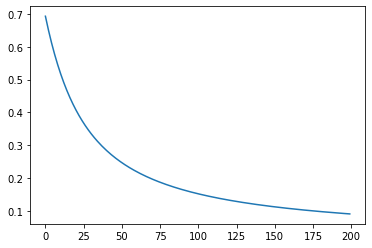

In [118]:
plt.plot(error_list)

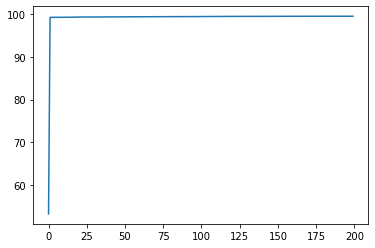

In [119]:
plt.plot(acc_list)

In [ ]:
X_train_pred = predict(X_new_train,theta)
X_test_pred = predict(X_new_test, theta)

train_accuracy = accuracy(Y_train,X_train_pred)
#print(X_test.shape, X_test_pred.shape)
test_accuracy = accuracy(Y_test, X_test_pred)
print(train_accuracy)
print(test_accuracy)

99.58547177260166
99.56573233320174
